# xSiGra visualize explanations

## 1. Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

 ## 2. Load cell and gene importance scores

In [2]:
cells = pd.read_csv("../cluster_results_gradcam_gt1/lung13/cluster7_tumors.csv",index_col=0)

## 3. xSiGra tumor colormap

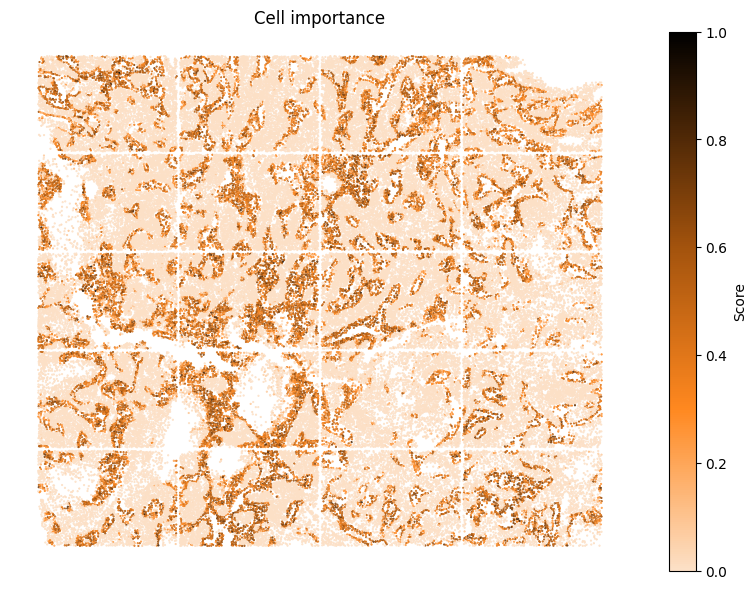

In [3]:
# Normalize score
min_value = cells['cell_imp_score'].min()
max_value = cells['cell_imp_score'].max()
cells['cell_imp_score'] = (cells['cell_imp_score'] - min_value) / (max_value - min_value)

cxg = cells["cx_g"]
cyg = cells["cy_g"]
colors=cells["cell_imp_score"]


# Create a custom colormap
gradient_colors = [
    (0.988, 0.878, 0.776),  # Very Light Orange
    (1, 0.533, 0.122),  # Dark Orange
    (0.639, 0.325, 0.051),
    (0.00, 0.00, 0.00)   # Black
]

positions = [0.0,0.3,0.6,1.0]

cmap = mcolors.LinearSegmentedColormap.from_list('Custom Colormap', list(zip(positions, gradient_colors)), N=256)

fig, axs = plt.subplots(1, 1, figsize=(10, 7))
#axs.invert_yaxis()

# Use the custom colormap
scatter = axs.scatter(cxg, cyg, c=colors, s=0.3, cmap=cmap)

axs.axis('off')
axs.set_title('Cell importance')
extent = axs.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

cbar = plt.colorbar(scatter, ax=axs)
cbar.set_label('Score')
plt.show()


## Similarly can create figures for other clusters

## 3. xSiGra tumor cell type

In [4]:
cells = pd.read_csv("../cluster_results_gradcam_gt1/lung13/cluster7_tumors.csv",index_col=0)
min_val = cells[cells['cell_imp_score'] > 0]['cell_imp_score'].min()
cells['cell_imp_score'] = cells['cell_imp_score'].apply(lambda x: x + min_val/2)

# Log normalization
cells['cell_imp_score']= np.log10(cells['cell_imp_score'])

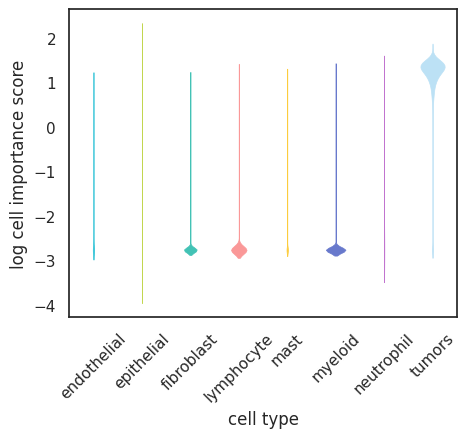

In [5]:
df = cells
sns.set_theme(style='white')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=df, width=0.5,scale="count",x='cell_type', y='cell_imp_score', inner=None, linewidth=0.5, saturation=0.5,order=["endothelial","epithelial","fibroblast","lymphocyte","mast","myeloid","neutrophil","tumors"])
plt.xticks(rotation=45)

# change alpha for edges and faces
#sns.set(rc={'figure.figsize':(5,3)})
ax.collections[0].set_edgecolor('#2dc2d6')
ax.collections[0].set_facecolor('#2dc2d6')

ax.collections[1].set_edgecolor('#c2d64f')
ax.collections[1].set_facecolor('#c2d64f')


ax.collections[2].set_edgecolor('#42c2b5')
ax.collections[2].set_facecolor('#42c2b5')


ax.collections[3].set_edgecolor('#fa9898')
ax.collections[3].set_facecolor('#fa9898')


ax.collections[4].set_edgecolor('#fccc3d')
ax.collections[4].set_facecolor('#fccc3d')


ax.collections[5].set_edgecolor('#6879cc')
ax.collections[5].set_facecolor('#6879cc')


ax.collections[6].set_edgecolor('#c174cf')
ax.collections[6].set_facecolor('#c174cf')


ax.collections[7].set_edgecolor('#bce1f5')
ax.collections[7].set_facecolor('#bce1f5')
ax.set(xlabel='cell type', ylabel='log cell importance score')

plt.show()


In [6]:
cells = pd.read_csv("../cluster_results_gradcam_gt1/lung13/cluster5_myeloid.csv",index_col=0)
min_val = cells[cells['cell_imp_score'] > 0]['cell_imp_score'].min()
cells['cell_imp_score'] = cells['cell_imp_score'].apply(lambda x: x + min_val/2)

# Log normalization
cells['cell_imp_score']= np.log10(cells['cell_imp_score'])

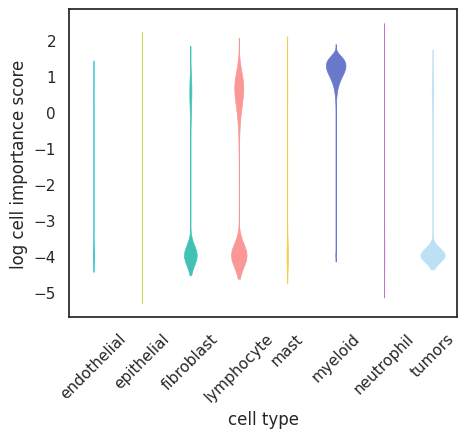

In [7]:
df = cells
sns.set_theme(style='white')

plt.figure(figsize=(5, 4))
ax = sns.violinplot(data=df, width=0.5,scale="count",x='cell_type', y='cell_imp_score', inner=None, linewidth=0.5, saturation=0.5,order=["endothelial","epithelial","fibroblast","lymphocyte","mast","myeloid","neutrophil","tumors"])
plt.xticks(rotation=45)

# change alpha for edges and faces
#sns.set(rc={'figure.figsize':(5,3)})
ax.collections[0].set_edgecolor('#2dc2d6')
ax.collections[0].set_facecolor('#2dc2d6')

ax.collections[1].set_edgecolor('#c2d64f')
ax.collections[1].set_facecolor('#c2d64f')


ax.collections[2].set_edgecolor('#42c2b5')
ax.collections[2].set_facecolor('#42c2b5')


ax.collections[3].set_edgecolor('#fa9898')
ax.collections[3].set_facecolor('#fa9898')


ax.collections[4].set_edgecolor('#fccc3d')
ax.collections[4].set_facecolor('#fccc3d')


ax.collections[5].set_edgecolor('#6879cc')
ax.collections[5].set_facecolor('#6879cc')


ax.collections[6].set_edgecolor('#c174cf')
ax.collections[6].set_facecolor('#c174cf')


ax.collections[7].set_edgecolor('#bce1f5')
ax.collections[7].set_facecolor('#bce1f5')
ax.set(xlabel='cell type', ylabel='log cell importance score')
plt.show()



## Similarly can create figures for other clusters

## 4. xSiGra tumor color code

In [8]:
import pandas as pd

In [9]:
cells = pd.read_csv("../cluster_results_gradcam_gt1/lung13/cluster7_tumors.csv",index_col=0)

In [10]:
def assign_color(row):
    if row['cell_imp_score'] > 0 and row['cell_type'] == "tumors":
        return '#fc3d03'
    elif row['cell_imp_score'] == 0 and row['cell_type'] == "tumors":
        return '#4f0c9c'
    elif row['cell_imp_score'] > 0 and row['cell_type'] != "tumors":
        return '#158a34'
    elif row['cell_imp_score'] == 0 and row['cell_type'] != "tumors":
        return '#cacccb'

# Apply the function to each row and create the 'colors' column
cells['colors'] = cells.apply(assign_color, axis=1)
cxg = cells["cx_g"]
cyg = cells["cy_g"]
colors=cells["colors"]


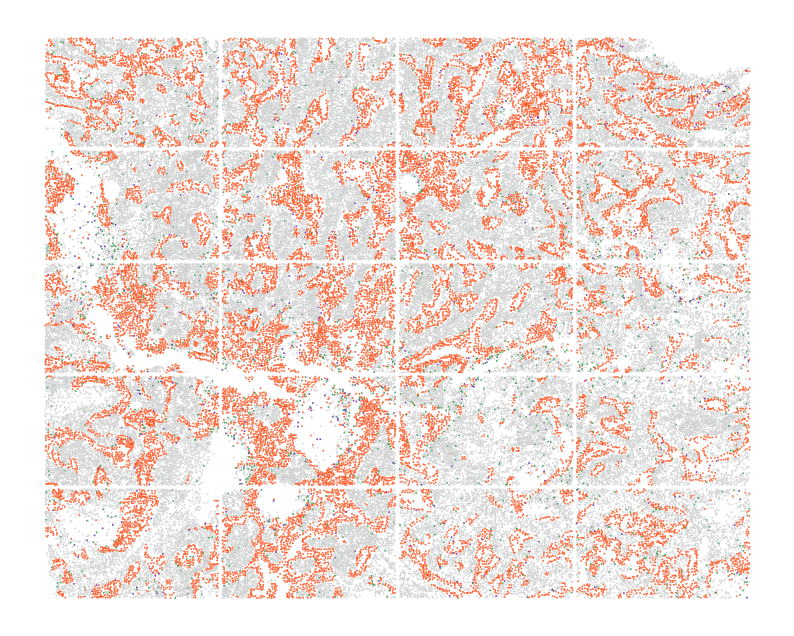

In [11]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,1,figsize=(10,8))
#axs.invert_yaxis()
axs.scatter(cxg, cyg, c=colors,marker="p",s=0.1)
axs.axis('off')
extent = axs.get_window_extent().transformed(fig.dpi_scale_trans.inverted())


In [12]:
cells = pd.read_csv("../cluster_results_gradcam_gt1/lung13/cluster5_myeloid.csv",index_col=0)

In [13]:
def assign_color(row):
    if row['cell_imp_score'] > 0 and row['cell_type'] == "myeloid":
        return '#fc3d03'
    elif row['cell_imp_score'] == 0 and row['cell_type'] == "myeloid":
        return '#4f0c9c'
    elif row['cell_imp_score'] > 0 and row['cell_type'] != "myeloid":
        return '#158a34'
    elif row['cell_imp_score'] == 0 and row['cell_type'] != "myeloid":
        return '#cacccb'

# Apply the function to each row and create the 'colors' column
cells['colors'] = cells.apply(assign_color, axis=1)
cxg = cells["cx_g"]
cyg = cells["cy_g"]
colors=cells["colors"]



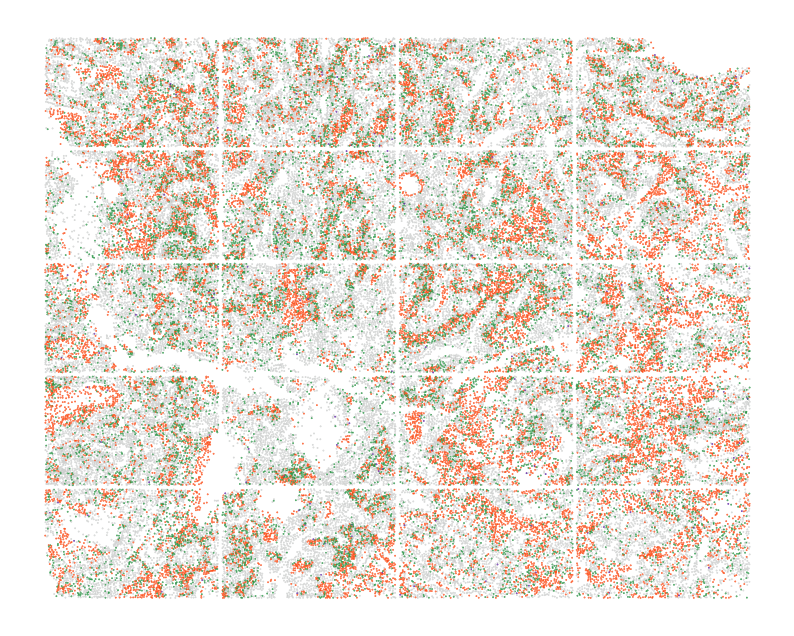

In [14]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,1,figsize=(10,8))
#axs.invert_yaxis()
axs.scatter(cxg, cyg, c=colors,marker="p",s=0.1)
axs.axis('off')
extent = axs.get_window_extent().transformed(fig.dpi_scale_trans.inverted())


## Similarly can create figures for other clusters